# Chapter 4: Deep Convolutional GAN (DCGAN)

In [409]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Sequential
from keras.optimizers import Adam

In [410]:
img_rows = 28 # 1920
img_cols = 28 # 1080
channels = 1  # 3

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100

## Generator

In [411]:
def build_generator(z_dim):

    model = Sequential()

    # Reshape input into 7x7x256 tensor via a fully connected layer
    model.add(Dense(256 * 7 * 7, input_dim=z_dim))
    model.add(Reshape((7, 7, 256)))

    # Transposed convolution layer, from 7x7x256 into 14x14x128 tensor
    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Transposed convolution layer, from 14x14x128 to 14x14x64 tensor
    model.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Transposed convolution layer, from 14x14x64 to 28x28x1 tensor
    model.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'))

    # Output layer with tanh activation 28* 28
    model.add(Activation('tanh'))
#     model.add(Dense(1920*1080*1,activation='tanh'))

    return model

## Discriminator

In [412]:
def build_discriminator(img_shape):

    model = Sequential()

    # Convolutional layer, from 28x28x1 into 14x14x32 tensor
    model.add(
        Conv2D(32,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Convolutional layer, from 14x14x32 into 7x7x64 tensor
    model.add(
        Conv2D(64,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Convolutional layer, from 7x7x64 tensor into 3x3x128 tensor
    model.add(
        Conv2D(128,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with sigmoid activation
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

## Build the Model

In [413]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [414]:
# Build and compile the Discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

# Build the Generator
generator = build_generator(z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

(1080, 1920, 3)


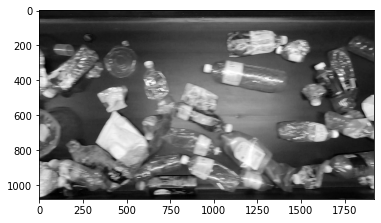

In [101]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
from matplotlib.colors import NoNorm
import numpy as np
lena = plt.imread("/home/gilbert3/Documents/mnt/1000/images/GH012582_240.jpg")
# 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
print(lena.shape) #(512, 512, 3)

plt.imshow(lena[:,:,2], cmap='gray')#,interpolation='none')
# plt.imshow(lena,cmap=plt.get_cmap('gray') )# 显示图片
# plt.axis('off') # 不显示坐标轴
# plt.show()

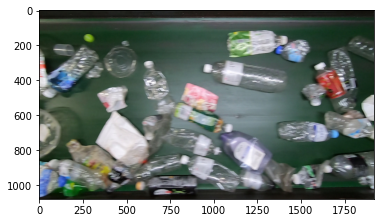

In [426]:
plt.imshow(lena)#,interpolation='none')

In [427]:

from glob import glob
import matplotlib.pyplot as plt #用于显示图片
from skimage.transform import resize
''' 生成sklearn training PET soy dataSet''' 
def load_imgesets(flist, out_npz,h, w):     
#def load_imgesets(flist, fList1,out_npz,h, w):  
    data = []
    # X_train = data
    data = np.array(data,dtype=float)
    flag = 1
    for fs in glob(flist):
        if flag == 1:
            flag = 0            
            # print (misc.imresize( Image.open(str[0]).convert('L'),(h,w) ).shape,"\n")
#              data = np.asarray(resize( plt.imread(fs)[:,:,1],(h,w) )).reshape(1,-1)
            data = np.asarray(resize( plt.imread(fs)[:,:,1],(h,w) )).reshape(1,w,h)
        else:
            row = np.asarray(resize( plt.imread(fs)[:,:,1],(h,w) )).reshape(1,w,h)
            #np.array(Image.open(str[0]).convert('L')).reshape(1, -1)
            data = np.row_stack((data, row))
    # x_test = data1 
    data1= np.zeros(len(glob(flist)))
    #=========================================== fList1 ==> y_train , y_test 
#     for fs in glob(flist1):
#         if flag == 1:
#             flag = 0            
#             # print (misc.imresize( Image.open(str[0]).convert('L'),(h,w) ).shape,"\n")
#             data2 = np.asarray(resize( plt.imread(fs)[:,:,1],(h,w) )).reshape(1,w,h)
#         else:
#             row = np.asarray(resize( plt.imread(fs)[:,:,1],(h,w) )).reshape(1,w,h)
#             #np.array(Image.open(str[0]).convert('L')).reshape(1, -1)
#             data = np.row_stack((data, row))
#     # y_test = data3 
#     data3= np.ones(len(glob(flist1)))
    #=========================================== fList1 ==> y_train , y_test 
    
#     np.savez('my_array3',*data,*data1)
    np.savez(out_npz,x_train=data,x_test=data1) 
#     np.savez(out_npz,x_train=data,x_test=data1,y_train= data2, y_test=data3) 
    return data ,data1

In [428]:
# (X_train, X_test) =load_imgesets("/home/gilbert3/Documents/mnt/images/*.jpg","my_array3",28,28)
(X_train, X_test) =load_imgesets("/home/gilbert3/Documents/mnt/images/*.jpg","my_array3",1080,1920)
#, (Y_train,Y_test)
# (Y_train, Y_test) =load_imgesets("/home/gilbert3/Documents/mnt/images/*.jpg","my_array3",1080,1920)
Y_test = X_test
Y_train = X_train

In [429]:
print(Y_train.shape,Y_test.shape)

(23, 1920, 1080) (23,)


In [433]:
len(np.ones(10))

10

In [434]:

container =  np.load('my_array3.npz')
data3 = [container[key] for key in container]
# for key in container:
#     print(key)
# print(container['x_train'])
print (type(data3))
print(len(data3))
print(type(data3[0]))

print((data3[0].shape),data3[1].shape)
# print( data3[0][0] )

<class 'list'>
2
<class 'numpy.ndarray'>
(23, 1920, 1080) (23,)


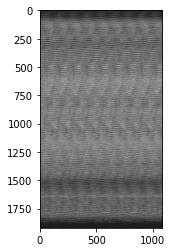

In [435]:
plt.imshow(  data3[0][0] ,cmap='gray')

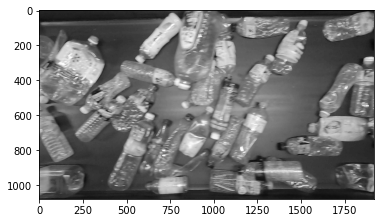

In [436]:
h = 1080
w = 1920
plt.imshow( np.array(data3[0][0]).reshape(h,w),cmap='gray')
 

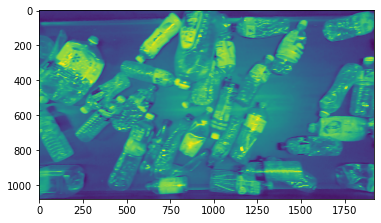

In [439]:
plt.imshow(np.array(data3[0][0]).reshape(h,w))

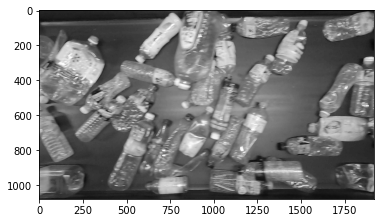

In [454]:
h = 1080
w = 1920
plt.imshow( resize(np.array(data3[0][0]).reshape(h,w),(1080,1920)),cmap='gray')

## Training

In [447]:
print(24*32," : " ,28*28)

768  :  784


In [440]:
losses = []
accuracies = []
iteration_checkpoints = []


def train(iterations, batch_size, sample_interval):

    # Load the MNIST dataset
    # (X_train, _), (_, _) = mnist.load_data()
    (X_train, X_test) =load_imgesets("/home/gilbert3/Documents/mnt/images/*.jpg","my_array3",28,28)
    Y_test = X_test
    Y_train = X_train
    
#     X_train = np.asarray(X_train.reshape(-1,w,h))
    
    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

#         print("=================: ",imgs.shape," : ",real.shape," : ", gen_imgs.shape," : ",fake.shape)
        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)

In [441]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

## Train the Model and Inspect Output

Note that the `'Discrepancy between trainable weights and collected trainable'` warning from Keras is expected. It is by design: The Generator's trainable parameters are intentionally held constant during Discriminator training, and vice versa.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


50 [D loss: 0.399486, acc.: 87.50%] [G loss: 0.713068]
100 [D loss: 0.452259, acc.: 75.00%] [G loss: 1.133925]
150 [D loss: 0.571810, acc.: 75.00%] [G loss: 0.666565]
200 [D loss: 0.609949, acc.: 75.00%] [G loss: 1.015353]
250 [D loss: 0.555257, acc.: 75.00%] [G loss: 1.339480]
300 [D loss: 0.360791, acc.: 75.00%] [G loss: 2.162005]
350 [D loss: 0.944403, acc.: 0.00%] [G loss: 0.898634]
400 [D loss: 0.194097, acc.: 100.00%] [G loss: 2.156978]
450 [D loss: 0.067058, acc.: 100.00%] [G loss: 2.217401]
500 [D loss: 0.430144, acc.: 87.50%] [G loss: 1.307299]
550 [D loss: 0.455957, acc.: 87.50%] [G loss: 1.202988]
600 [D loss: 0.666719, acc.: 50.00%] [G loss: 1.103381]
650 [D loss: 0.714842, acc.: 50.00%] [G loss: 0.735209]
700 [D loss: 0.618391, acc.: 50.00%] [G loss: 1.364015]
750 [D loss: 0.461845, acc.: 100.00%] [G loss: 1.679922]
800 [D loss: 0.572756, acc.: 100.00%] [G loss: 1.126022]
850 [D loss: 0.496526, acc.: 100.00%] [G loss: 0.842238]
900 [D loss: 0.475118, acc.: 75.00%] [G loss:

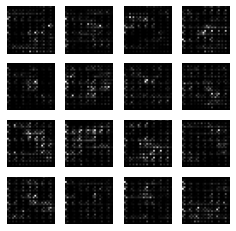

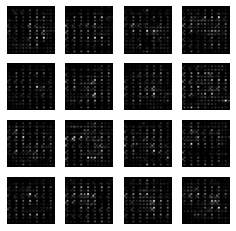

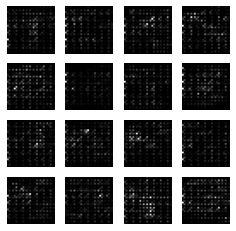

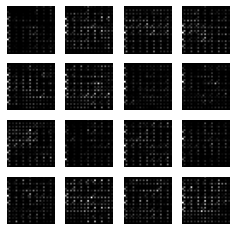

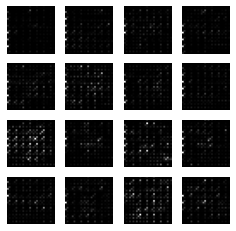

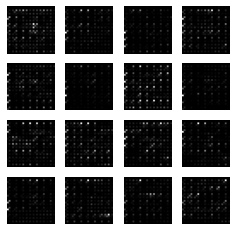

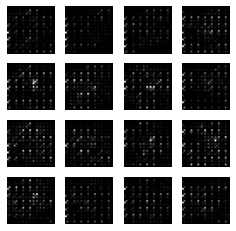

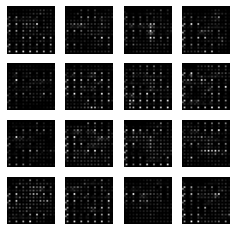

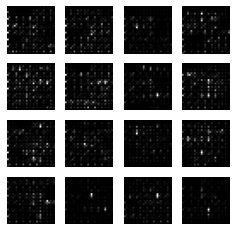

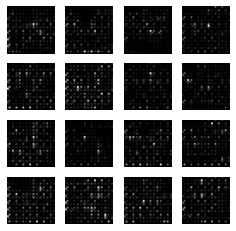

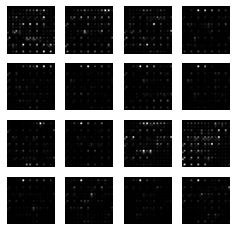

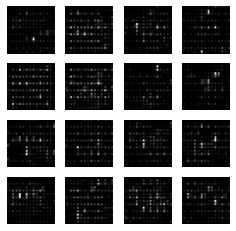

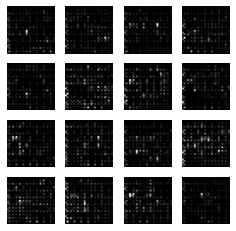

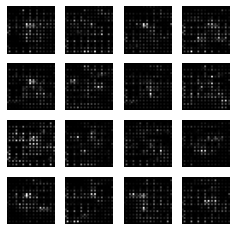

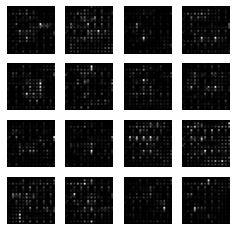

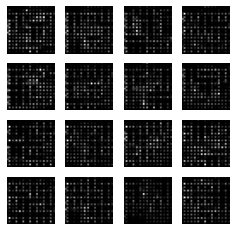

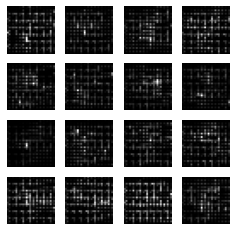

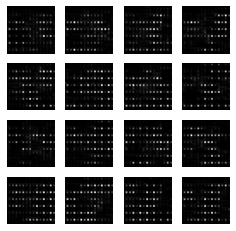

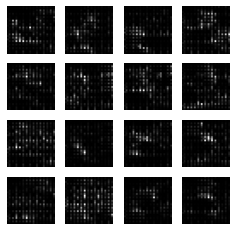

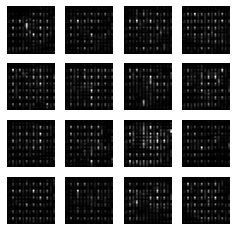

In [442]:
# Set hyperparameters
iterations = 1001
batch_size = 4 # ==> (purny) 
sample_interval = 50

# Train the DCGAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

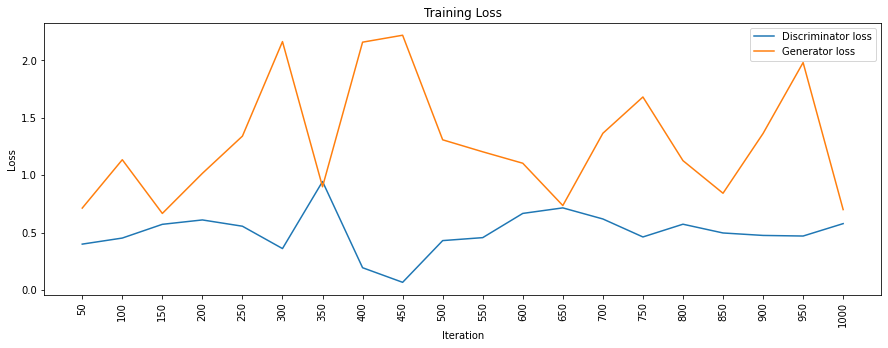

In [443]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

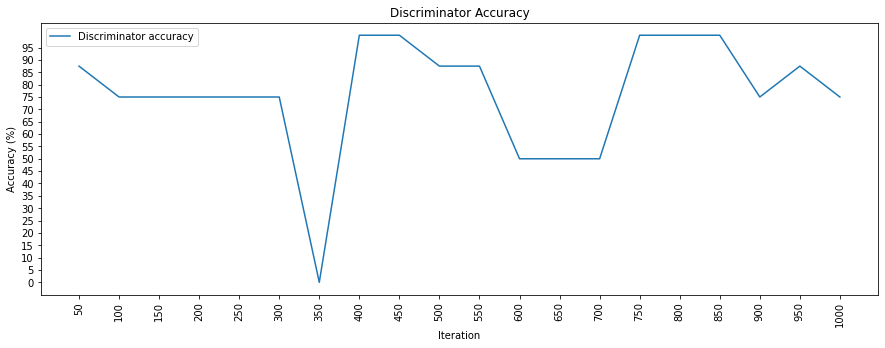

In [444]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()